In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


# Load the CSV file into a Pandas DataFrame
pubmed_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Text Mining/annotated_pubmed.csv')

display(pubmed_df)

,sentence,label
0,Levels of cholesterol fractions in patients wi...,0
1,Faster aspart and IAsp were confirmed noninfer...,0
2,Major operative morbidity after minimally inva...,0
3,"The promise of combining risk assessment, comm...",0
4,PPARÎ´ peroxisome proliferator-activated recep...,0
...,...,...
3056,The etiology of anemia appears to be iron-rela...,1
3057,DM is associated with poor outcomes in patient...,1
3058,The BDI is a significant predictor of long-ter...,1
3059,Poor glycemic control among diabetics is a ris...,1


In [ ]:
# Load the CSV file into a Pandas DataFrame
eureka_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Text Mining/annotated_eureka.csv')

display(eureka_df)

,sentId,sentence,label
0,20824800-w-lss012611-0-title,Low socioeconomic status increases depression ...,3
1,20824800-w-lss012611-1-sentence,A recent study confirmed that low socioeconomi...,1
2,20824800-w-lss012611-2-sentence,"Statistically significant differences in race,...",1
3,20825768-nch-nns011711-0-title,New national study finds 11 500 emergency depa...,0
4,20825768-nch-nns011711-1-sentence,Known by many as one of the least favorite win...,1
...,...,...,...
2071,26837813-b-pfa020216-2-sentence,These results do not support a direct (causal)...,1
2072,28637644-uoe-ccp062217-1-sentence,Specialist antenatal clinics for severely obes...,3
2073,25690672-uoc--urd011315-0-title,UCLA researchers develop new tool to predict p...,1
2074,24171920-tes-ltl102813-0-title,Low thyroid levels may signal heightened risk ...,1


Preprocessing

In [ ]:
X_pubmed = pubmed_df['sentence']
y_pubmed = pubmed_df['label']


VEctorisation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

In [ ]:

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(min_df=5, stop_words='english')

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

In [ ]:

# Create a pipeline with TF-IDF vectorization and SVM classification
text_classification_pipeline = Pipeline([("tfidf", tfidf_vectorizer), ("svm", svm_classifier)])


In [ ]:
# Cross-validation on PubMed data
cv_results = cross_validate(text_classification_pipeline, pubmed_df['sentence'], pubmed_df['label'], cv=3, scoring=["accuracy"])
display(cv_results)

{'fit_time': array([2.08371258, 1.30744338, 1.12848115]),
 'score_time': array([0.61966443, 0.36240435, 0.32333422]),
 'test_accuracy': array([0.70323213, 0.69509804, 0.69411765])}

In [ ]:

# Train the pipeline on PubMed data
text_classification_pipeline.fit(pubmed_df['sentence'], pubmed_df['label'])


Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=5, stop_words='english')),
                ('svm', SVC(kernel='linear'))])

In [ ]:
# Test the pipeline on Eureka data
X_eureka = eureka_df['sentence']  # Original text data
y_eureka = eureka_df['label']
y_pred_eureka = text_classification_pipeline.predict(X_eureka)  # Apply the pipeline directly to the original text data


In [ ]:
# Evaluate the performance on Eureka data
classification_report_eureka = classification_report(y_eureka, y_pred_eureka)
print(classification_report_eureka)

              precision    recall  f1-score   support

           0       0.34      0.79      0.48       486
           1       0.63      0.62      0.63       738
           2       0.44      0.06      0.10       284
           3       0.65      0.22      0.33       568

    accuracy                           0.47      2076
   macro avg       0.52      0.42      0.38      2076
weighted avg       0.55      0.47      0.44      2076



confusion matrix

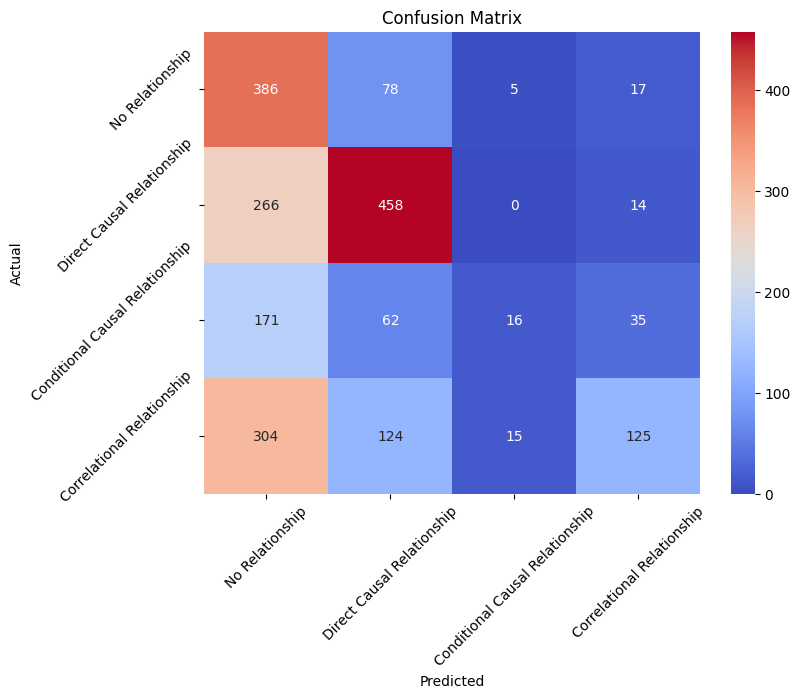

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Your confusion matrix
conf_matrix = confusion_matrix(y_eureka, y_pred_eureka)

# Define custom labels for the axes
labels = ["No Relationship", "Direct Causal Relationship", "Conditional Causal Relationship", "Correlational Relationship"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Set custom labels for the x and y axes with 45-degree rotation for better readability
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=labels, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=labels, rotation=45)

plt.show()


misclassifcation

In [ ]:
import pandas as pd

actual_labels = pd.Series(y_eureka, name='Actual Label')
predicted_labels = pd.Series(y_pred_eureka, name='Predicted Label')
misclassified_samples = pd.concat([eureka_df['sentence'], actual_labels, predicted_labels], axis=1)
display(misclassified_samples)


,sentence,Actual Label,Predicted Label
0,Low socioeconomic status increases depression ...,3,1
1,A recent study confirmed that low socioeconomi...,1,1
2,"Statistically significant differences in race,...",1,1
3,New national study finds 11 500 emergency depa...,0,1
4,Known by many as one of the least favorite win...,1,1
...,...,...,...
2071,These results do not support a direct (causal)...,1,1
2072,Specialist antenatal clinics for severely obes...,3,0
2073,UCLA researchers develop new tool to predict p...,1,1
2074,Low thyroid levels may signal heightened risk ...,1,1


In [ ]:
# Create a new column "Correct Prediction" with 'YES' or 'NO'
misclassified_samples['Correct Prediction'] = (misclassified_samples['Actual Label'] == misclassified_samples['Predicted Label']).map({True: 'YES', False: 'NO'})

# Count 'YES' and 'NO'
counted = misclassified_samples['Correct Prediction'].value_counts()

display(misclassified_samples)
print(counted)

,sentence,Actual Label,Predicted Label,Correct Prediction
0,Low socioeconomic status increases depression ...,3,1,NO
1,A recent study confirmed that low socioeconomi...,1,1,YES
2,"Statistically significant differences in race,...",1,1,YES
3,New national study finds 11 500 emergency depa...,0,1,NO
4,Known by many as one of the least favorite win...,1,1,YES
...,...,...,...,...
2071,These results do not support a direct (causal)...,1,1,YES
2072,Specialist antenatal clinics for severely obes...,3,0,NO
2073,UCLA researchers develop new tool to predict p...,1,1,YES
2074,Low thyroid levels may signal heightened risk ...,1,1,YES


NO     1091
YES     985
Name: Correct Prediction, dtype: int64


Top features

In [ ]:
from scipy.sparse import csr_matrix

# Define labels for the categories
categories = ["No Relationship", "Direct Causal Relationship", "Conditional Causal Relationship", "Correlational Relationship"]


In [ ]:

for category_idx, category_label in enumerate(categories):
    # Get the coefficients for the current category
    category_coefs = text_classification_pipeline.named_steps['svm'].coef_[category_idx]

    # Convert the CSR matrix to a regular NumPy array
    category_coefs = category_coefs.toarray()[0]

    # Get the feature names
    feature_names = text_classification_pipeline.named_steps['tfidf'].get_feature_names_out()

    # Feature Ranking for the current category
    feature_ranks = sorted(zip(category_coefs, feature_names), reverse=True)
    topN = 20
    topN_words = feature_ranks[:topN]

    print(f"Top 20 words with {category_label}:")
    for i, (coef, feature_name) in enumerate(topN_words, 1):
        print(f"{i}. {feature_name} (coef: {coef:.4f})")
    print()


Top 20 words with No Relationship:
1. needed (coef: 2.2289)
2. studies (coef: 2.1074)
3. research (coef: 1.8649)
4. necessary (coef: 1.7062)
5. assessment (coef: 1.6941)
6. treatment (coef: 1.5088)
7. follow (coef: 1.4717)
8. safety (coef: 1.3744)
9. monitoring (coef: 1.3648)
10. performed (coef: 1.3536)
11. require (coef: 1.3388)
12. evaluation (coef: 1.3364)
13. understanding (coef: 1.3284)
14. impact (coef: 1.3268)
15. prevention (coef: 1.3197)
16. adequate (coef: 1.3086)
17. implications (coef: 1.3000)
18. national (coef: 1.2830)
19. focus (coef: 1.2788)
20. suboptimal (coef: 1.2243)

Top 20 words with Direct Causal Relationship:
1. needed (coef: 1.7571)
2. studies (coef: 1.2604)
3. research (coef: 1.1176)
4. syndrome (coef: 1.0424)
5. understanding (coef: 1.0307)
6. need (coef: 1.0168)
7. order (coef: 1.0139)
8. clinically (coef: 0.9246)
9. require (coef: 0.9031)
10. warrant (coef: 0.8984)
11. children (coef: 0.8617)
12. identify (coef: 0.8528)
13. remain (coef: 0.8148)
14. nurses

BERT


In [ ]:
# install BERT sklearn wrapper written by charles9n
# check out the github page for fine tuning options and usage
# https://github.com/charles9n/bert-sklearn

!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 3.91 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Processing /content/bert-sklearn
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.7 MB/s eta 0:00:00
  Created wheel for bert-sklearn: filename=bert_sklearn-0.3.1-py3-none-any.whl size=54223 sha256=38f0a1080c323887d033f1e59b63d21298b402afcac382c17aeb6b7125b50fc2
  Stored in directory: /root/.cache/pip/wheels/29/f7/03/c9d257b287e1a5ef7ee4300cbbcd70cfbb13e8b6759da24477
Successfully built bert-sklearn


In [ ]:
from bert_sklearn import BertClassifier
model = BertClassifier(epochs=2)

Building sklearn text classifier...


In [ ]:
# Train the model on the PubMed data
model.fit(pubmed_df['sentence'].values, pubmed_df['label'].values)


100%|██████████| 231508/231508 [00:00<00:00, 949032.49B/s]


Loading bert-base-uncased model...


100%|██████████| 433/433 [00:00<00:00, 975367.15B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 2755, validation data size: 306



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training  :   0%|          | 0/87 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1519.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Validating:   0%|          | 0/39 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.7821, Val loss: 0.3432, Val accy: 87.91%



Training  :   0%|          | 0/87 [00:00<?, ?it/s]

Validating:   0%|          | 0/39 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.1994, Val loss: 0.3497, Val accy: 87.91%



BertClassifier(do_lower_case=True, epochs=2, label_list=array([0, 1, 2, 3]))

In [ ]:
from sklearn.model_selection import cross_val_score
# Define a function to perform cross-validation and return the F1 scores
def cross_val_bert(model, X, y, cv=3):
    # Perform cross-validation and use weighted F1 as the scoring metric
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    return scores

In [ ]:

# Perform cross-validation on the PubMed data
cv_scores = cross_val_bert(model, pubmed_df['sentence'].values, pubmed_df['label'].values, cv=3)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Building sklearn text classifier...
Loading bert-base-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 1836, validation data size: 204



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training  :   0%|          | 0/58 [00:00<?, ?it/s]

Validating:   0%|          | 0/26 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.9801, Val loss: 0.6154, Val accy: 78.43%



Training  :   0%|          | 0/58 [00:00<?, ?it/s]

Validating:   0%|          | 0/26 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.3709, Val loss: 0.3735, Val accy: 87.75%



Predicting:   0%|          | 0/128 [00:00<?, ?it/s]

Building sklearn text classifier...
Loading bert-base-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 1837, validation data size: 204



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training  :   0%|          | 0/58 [00:00<?, ?it/s]

Validating:   0%|          | 0/26 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.8488, Val loss: 0.4452, Val accy: 84.80%



Training  :   0%|          | 0/58 [00:00<?, ?it/s]

Validating:   0%|          | 0/26 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.2392, Val loss: 0.3574, Val accy: 86.76%



Predicting:   0%|          | 0/128 [00:00<?, ?it/s]

Building sklearn text classifier...
Loading bert-base-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 1837, validation data size: 204



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training  :   0%|          | 0/58 [00:00<?, ?it/s]

Validating:   0%|          | 0/26 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.9072, Val loss: 0.5317, Val accy: 80.88%



Training  :   0%|          | 0/58 [00:00<?, ?it/s]

Validating:   0%|          | 0/26 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.2909, Val loss: 0.4594, Val accy: 80.88%



Predicting:   0%|          | 0/128 [00:00<?, ?it/s]

Cross-Validation Scores: [0.85624417 0.86485465 0.87665078]
Mean F1 Score: 0.8659165319336722


In [ ]:
# Save the trained BERT model
model.save('bert.model')

In [ ]:
# Test the model on the Eureka data
bert_acc = model.score(eureka_df['sentence'].values, eureka_df['label'].values)
print("BERT Accuracy:", bert_acc)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Testing:   0%|          | 0/260 [00:00<?, ?it/s]


Loss: 0.6479, Accuracy: 79.38%
BERT Accuracy: 79.38342967244701


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the Eureka data
y_pred_bert = model.predict(eureka_df['sentence'].values)

# Get the true labels from the Eureka dataset
y_true = eureka_df['label'].values

# Generate the classification report
classification_rep = classification_report(y_true, y_pred_bert, target_names=['No relationship', 'Direct causal', 'Conditional causal', 'Correlational'])

# Print the classification report
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Predicting:   0%|          | 0/260 [00:00<?, ?it/s]

Classification Report:
                     precision    recall  f1-score   support

   No relationship       0.62      0.81      0.71       486
     Direct causal       0.86      0.79      0.82       738
Conditional causal       0.89      0.84      0.86       284
     Correlational       0.87      0.76      0.81       568

          accuracy                           0.79      2076
         macro avg       0.81      0.80      0.80      2076
      weighted avg       0.81      0.79      0.80      2076



In [ ]:
#error analysis

In [ ]:
# Make predictions on the Eureka data
y_pred_eureka = model.predict(eureka_df['sentence'].values)

# Get the true labels from the Eureka dataset
y_true_eureka = eureka_df['label'].values

# Create a list of misclassified indices
misclassified_ind_eureka = [i for i in range(len(y_pred_eureka)) if y_pred_eureka[i] != y_true_eureka[i]]

# Create a DataFrame for misclassified samples
misclassified_samples_eureka = pd.DataFrame({'Sentence': eureka_df['sentence'].iloc[misclassified_ind_eureka],
                                            'Actual Label': y_true_eureka[misclassified_ind_eureka],
                                            'Predicted Label': y_pred_eureka[misclassified_ind_eureka]})

# Display the misclassified samples
display(misclassified_samples_eureka)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Predicting:   0%|          | 0/260 [00:00<?, ?it/s]

,Sentence,Actual Label,Predicted Label
3,New national study finds 11 500 emergency depa...,0,1
10,Venous thromboembolism (VTE) is the third most...,0,1
11,Researchers at the Centre for Primary Health C...,3,1
12,Mayo Clinic researchers confirm value of thera...,3,0
14,"In therapeutic hypothermia, a patient's body t...",0,3
...,...,...,...
2063,More than 87 percent of those homicides are du...,3,0
2065,Families of survivors of ECMO for heart condit...,1,0
2066,Eating a healthy breakfast has been shown to p...,0,3
2069,Lifestyle study highlights key differences in ...,0,1


In [ ]:

# Create a list of misclassified indices
misclassified_ind_eureka = [i for i in range(len(y_pred_eureka)) if y_pred_eureka[i] != y_true_eureka[i]]

# Count the number of misclassified samples
misclassified_count = len(misclassified_ind_eureka)

print("Number of Misclassified Samples:", misclassified_count)

Number of Misclassified Samples: 428


Predicting:   0%|          | 0/260 [00:00<?, ?it/s]

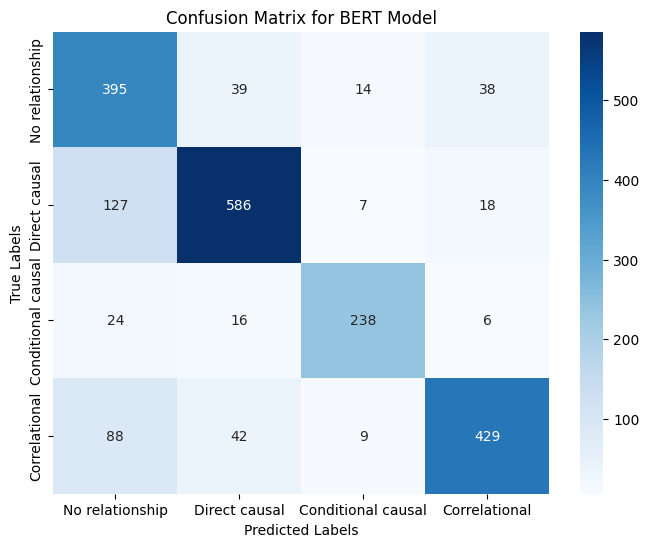

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the Eureka data
y_pred_bert = model.predict(eureka_df['sentence'].values)

# Get the true labels from the Eureka dataset
y_true = eureka_df['label'].values

# Create the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred_bert)

# Define the class labels
class_labels = ['No relationship', 'Direct causal', 'Conditional causal', 'Correlational']

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BERT Model')
plt.show()

#Zero shot Classification

In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline
import pandas as pd

In [ ]:

# Create a zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", device=0)

# Define candidate labels for claim strength categories
candidate_labels = ["No relationship", "Direct causal", "Conditional causal", "Correlational"]


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
def perform_zero_shot_classification(data_df, task_name):
    predictions = []
    true_labels = data_df['label'].tolist()

    for index, row in data_df.iterrows():
        sentence = row['sentence']
        classification_result = classifier(sentence, candidate_labels)

        if classification_result and 'labels' in classification_result:
            predicted_label = classification_result['labels'][0]
        else:
            predicted_label = "Unknown"

        predictions.append(predicted_label)

    return true_labels, predictions


In [ ]:
# Perform zero-shot classification on the PubMed dataset
pubmed_true_labels, pubmed_predictions = perform_zero_shot_classification(pubmed_df, task_name="PubMed")


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [ ]:
# Perform zero-shot classification on the Eureka dataset
eureka_true_labels, eureka_predictions = perform_zero_shot_classification(eureka_df, task_name="Eureka")


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
# Create a label encoder
label_encoder = LabelEncoder()




In [ ]:
# Create a custom label-to-integer mapping for candidate labels
label_to_int_mapping = {label: i for i, label in enumerate(candidate_labels)}

# Map labels not in candidate_labels to "Unknown"
pubmed_predictions = [label if label in candidate_labels else "Unknown" for label in pubmed_predictions]


In [ ]:
# Map labels not in candidate_labels to "Unknown"
eureka_predictions = [label if label in candidate_labels else "Unknown" for label in eureka_predictions]


In [ ]:

# Encode the true labels to numerical values
pubmed_true_labels_encoded = label_encoder.fit_transform(pubmed_true_labels)


In [ ]:

# Encode the true labels to numerical values for Eureka dataset
eureka_true_labels_encoded = label_encoder.transform(eureka_true_labels)

In [ ]:
# Encode the predicted labels using the label encoder
pubmed_predictions_encoded = [label_to_int_mapping[label] for label in pubmed_predictions]


In [ ]:
# Encode the predicted labels using the label encoder
eureka_predictions_encoded = [label_to_int_mapping[label] for label in eureka_predictions]


In [ ]:

# Calculate precision, recall, and F1 scores for PubMed dataset based on predictions
pubmed_precision = precision_score(pubmed_true_labels_encoded, pubmed_predictions_encoded, average=None)
pubmed_recall = recall_score(pubmed_true_labels_encoded, pubmed_predictions_encoded, average=None)
pubmed_f1 = f1_score(pubmed_true_labels_encoded, pubmed_predictions_encoded, average=None)
pubmed_macro_f1 = f1_score(pubmed_true_labels_encoded, pubmed_predictions_encoded, average='macro')

# Print precision, recall, F1 scores, and macro F1 score
print("Precision:", pubmed_precision)
print("Recall:", pubmed_recall)
print("F1 Score:", pubmed_f1)
print("Macro F1 Score:", pubmed_macro_f1)

# Generate the classification report using the encoded labels
classification_pubmed = classification_report(pubmed_true_labels_encoded, pubmed_predictions_encoded, target_names=candidate_labels)

# Print the classification report
print("Classification Report for PubMed:\n", classification_pubmed)


Precision: [0.16374269 0.375      0.05734767 0.15635939]
Recall: [0.02064897 0.01503006 0.07511737 0.81376518]
F1 Score: [0.03667322 0.02890173 0.06504065 0.26231648]
Macro F1 Score: 0.0982330190778828
Classification Report for PubMed:
                     precision    recall  f1-score   support

   No relationship       0.16      0.02      0.04      1356
     Direct causal       0.38      0.02      0.03       998
Conditional causal       0.06      0.08      0.07       213
     Correlational       0.16      0.81      0.26       494

          accuracy                           0.15      3061
         macro avg       0.19      0.23      0.10      3061
      weighted avg       0.22      0.15      0.07      3061



In [ ]:

# Calculate precision, recall, and F1 scores for Eureka dataset based on predictions
eureka_precision = precision_score(eureka_true_labels_encoded, eureka_predictions_encoded, average=None)
eureka_recall = recall_score(eureka_true_labels_encoded, eureka_predictions_encoded, average=None)
eureka_f1 = f1_score(eureka_true_labels_encoded, eureka_predictions_encoded, average=None)
eureka_macro_f1 = f1_score(eureka_true_labels_encoded, eureka_predictions_encoded, average='macro')

# Print precision, recall, F1 scores, and macro F1 score for Eureka dataset
print("Eureka Precision:", eureka_precision)
print("Eureka Recall:", eureka_recall)
print("Eureka F1 Score:", eureka_f1)
print("Eureka Macro F1 Score:", eureka_macro_f1)

# Generate the classification report using the encoded labels for Eureka dataset
classification_eureka = classification_report(eureka_true_labels_encoded, eureka_predictions_encoded, target_names=candidate_labels)

# Print the classification report for Eureka dataset
print("Classification Report for Eureka:\n", classification_eureka)

Eureka Precision: [0.14545455 0.35897436 0.14136126 0.26353992]
Eureka Recall: [0.01646091 0.01897019 0.09507042 0.83098592]
Eureka F1 Score: [0.02957486 0.03603604 0.11368421 0.40016956]
Eureka Macro F1 Score: 0.14486616782612508
Classification Report for Eureka:
                     precision    recall  f1-score   support

   No relationship       0.15      0.02      0.03       486
     Direct causal       0.36      0.02      0.04       738
Conditional causal       0.14      0.10      0.11       284
     Correlational       0.26      0.83      0.40       568

          accuracy                           0.25      2076
         macro avg       0.23      0.24      0.14      2076
      weighted avg       0.25      0.25      0.14      2076



Question 3


In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# Load the health news headlines dataset
data_headlines= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Text Mining/Eureka_headlines_10000.csv')

corpus = data_headlines['title']

In [ ]:
# if necessary, sample down the data

print(len(corpus))

10000


In [ ]:
# tfidf representation

from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

5069


In [ ]:
from sklearn.cluster import KMeans

K = 10
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0) + 1
  print(cnt_perCluster)

print_cluster_sizes(tfidf_model)

{1: 713, 4: 4476, 8: 429, 2: 825, 3: 308, 9: 1017, 5: 330, 0: 529, 6: 737, 7: 636}


In [ ]:
# print documents closest to each centroid
# sometimes we see a doc from another cluster j ends up in the list of the closest to centroid i
# this can happen when two clusters share some characteristics,
# e.g. cluster i is about hanging out with friend, cluster j is about entertainment, a doc about going to movie with friends may be close to both centroids

import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0 , cluster size: 529
[ this doc is in a different cluster # 4 >> Who are you kidding?
[ this doc is in a different cluster # 4 >> When you always gotta go...
[ this doc is in a different cluster # 4 >> Lollipop or edible?
[ this doc is in a different cluster # 4 >> Also in the May 27 JNCI
Heart failure after first heart attack may increase cancer risk


======cluster # 1 , cluster size: 713
[ this doc is in a different cluster # 4 >> When you always gotta go...
[ this doc is in a different cluster # 4 >> Also in the May 27 JNCI
[ this doc is in a different cluster # 4 >> Who are you kidding?
[ this doc is in a different cluster # 4 >> Lollipop or edible?
Quarantine on cruise ship resulted in more Corona patients


======cluster # 2 , cluster size: 825
[ this doc is in a different cluster # 4 >> Lollipop or edible?
[ this doc is in a different cluster # 4 >> Also in the May 27 JNCI
[ this doc is in a different cluster # 4 >> When you always gotta go...
[ this doc is i

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
# sometimes it does not work
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)

    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


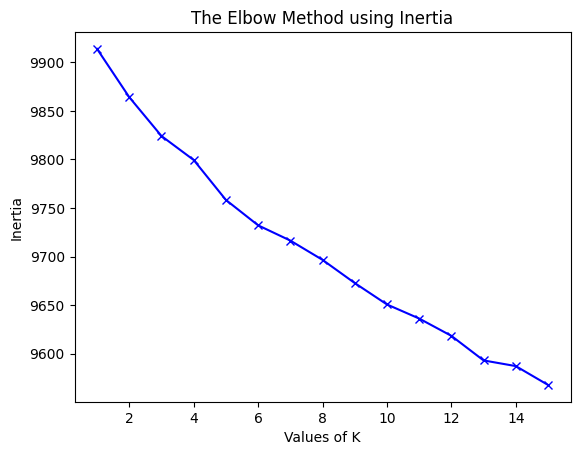

In [ ]:
elbow(15, tfidf)

SBert

In [ ]:
# compared to SBERT
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 10  # change number of cluster if applicable
sbert_model = KMeans(n_clusters=K, random_state=0)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list
print_cluster_sizes(sbert_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{5: 1348, 3: 901, 8: 1241, 6: 917, 1: 827, 2: 1212, 7: 889, 0: 923, 9: 732, 4: 1010}


In [ ]:
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0 , cluster size: 923
Nearly 1 in 5 with highest cardiac risk don't think they need to improve health
Targeting cardiovascular disease risk factors may be important across a lifetime
Penn researchers closer to uncovering a new feature in heart failure
New research can improve heart health
A fuse of cardiovascular diseases
Age and obesity conspire to damage the tiny blood vessels that feed the heart, causing heart failure
Staying fit can cut your risk of heart attack by half
Method helps determine heart failure patients' risks
Greater emphasis on preventing, treating heart disease in women needed
Younger doctors prescribe more drugs to reduce heart risk but offer less lifestyle advice


======cluster # 1 , cluster size: 827
Premature delivery linked to heightened risk of early death for mothers
Early term babies are at greater risk for diabetes and obesity-related diseases
Early planned birth linked to risk of poor child development
Clinical trial strives to provide op

BERTopic


In [ ]:
!pip install bertopic

In [ ]:
!pip show joblib

Name: joblib
Version: 1.3.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: hdbscan, imbalanced-learn, librosa, mlxtend, music21, nltk, pynndescent, scikit-learn


In [ ]:
# if necessary, sample down the data
docs = data_headlines.sample(n=1000, random_state=0)['title'].tolist()
print(len(docs))

1000


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2023-10-28 03:15:24,252 - BERTopic - Transformed documents to Embeddings
2023-10-28 03:15:47,936 - BERTopic - Reduced dimensionality
2023-10-28 03:15:48,182 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored.

freq = topic_model.get_topic_info();
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

24


,Topic,Count,Name,Representation,Representative_Docs
0,-1,270,-1_in_of_for_to,"[in, of, for, to, with, risk, may, cancer, stu...",[Study of one million Danish children: Childho...
1,0,91,0_dementia_brain_in_cognitive,"[dementia, brain, in, cognitive, of, alzheimer...",[The role of verb fluency in the detection of ...
2,1,87,1_heart_stroke_attack_blood,"[heart, stroke, attack, blood, kidney, disease...",[Molecular therapy set to protect at-risk pati...
3,2,73,2_obesity_weight_loss_exercise,"[obesity, weight, loss, exercise, fat, in, foo...",[Impact of lifestyle behaviors in early childh...
4,3,59,3_depression_violence_stress_adolescents,"[depression, violence, stress, adolescents, pt...",[Teenage depression linked to father's depress...
5,4,44,4_care_health_hospital_readmission,"[care, health, hospital, readmission, nurse, t...",[Medicaid patients need support to use primary...
6,5,34,5_liver_fatty_drinking_disease,"[liver, fatty, drinking, disease, alcohol, con...",[Alcohol consumption and metabolic factors act...
7,6,32,6_19_covid_flu_malaria,"[19, covid, flu, malaria, infectious, lancet, ...",[The Lancet Infectious Diseases: Preliminary r...
8,7,32,7_breast_cancer_women_therapy,"[breast, cancer, women, therapy, screening, su...",[9-country study shows wide variations in how ...
9,8,29,8_diabetes_type_diabetic_drug,"[diabetes, type, diabetic, drug, disease, hear...","[Eating eggs reduces risk of type 2 diabetes, ..."


In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
["The role of verb fluency in the detection of early cognitive impairment in Alzheimer's disease", 'Effects of at-home cognitive stimulation therapy on dementia patients and caregivers', 'Age-related eye disease may be associated with cognitive impairment']

== Representative documents in cluster # 1
['Molecular therapy set to protect at-risk patients against heart attack and stroke', "Better measure of 'good cholesterol' can gauge heart attack and stroke risk in some populations", 'Heart disease linked to a higher risk of kidney failure']

== Representative documents in cluster # 2
['Impact of lifestyle behaviors in early childhood on obesity', 'Excessive weight gain in early childhood affects teenage heart health', 'Long-term stress linked to higher levels of obesity']

== Representative documents in cluster # 3
["Teenage depression linked to father's depression", 'Depression linked to increased risk of stroke in women', 'First UK study of 

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('dementia', 0.051373959282415185),
 ('brain', 0.04656136668134433),
 ('in', 0.03559661949947956),
 ('cognitive', 0.035148105739194906),
 ('of', 0.030967402556509035),
 ('alzheimer', 0.03036139291258617),
 ('with', 0.029767828748417935),
 ('new', 0.024233996066395248),
 ('impairment', 0.024210989873488863),
 ('delirium', 0.024210989873488863)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)